## The Projective Plane 

The projective plane is the collection of lines in $\maR^3$ through the origin. These lines take on physical significance when viewed as taking a planar "scene" onto a planar "canvas."

We start, see Figure \ref{fig:persp1}, with the **classical** setting of perspective painting.
We place the (red) scene on the plane $z=z_0$, the (blue) canvas on the plane $x=x_0$, the painter's (green) eye at the origin, $[0,0,0]$, and a pair of parallel (black) railroad tracks in our scene at $[x,\pm 1,z_0]$, where $x_a<x<x_b$.

We compute the projection of the negative ($y=-1$) track onto the canvas. Each point from the eye to this track lies on the line

\begin{equation}\label{eq:proj0}
  t[x,-1,z_0]
\end{equation}

This line hits the canvas when $tx=x_0$, i.e., when $t=x_0/x$, and so hits the canvas at

\begin{equation}\label{eq:projt}
    (x_0/x)[x, -1, z_0] = [x_0, -x_0/x, z_0x_0/x]
\end{equation}

and so, on the canvas plane ($x=x_0$) we find the (dashed) line $z=-z_0y=2y$ using $z_0=-2$ as in the code example below.

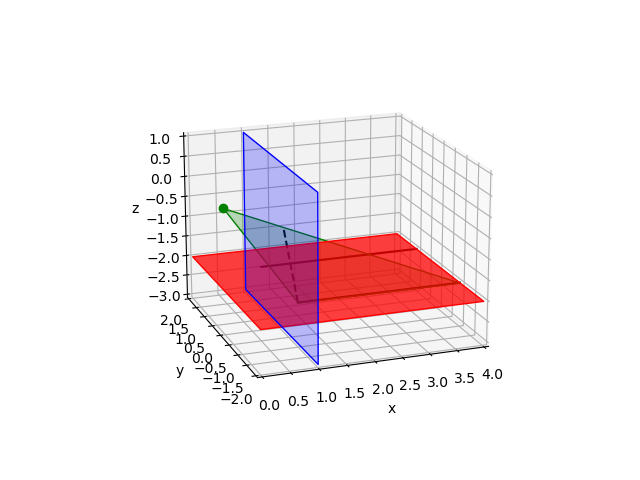

In [1]:
# painter perspective
%matplotlib widget
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = 18, azim = -110)

z0 = -2
# create the scene plane 
x = [0, 4, 4, 0]
y = [-2, -2, 2, 2]
z = [z0, z0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'r', alpha = 0.75))

x0 = 1
# create the canvas plane 
x = [x0, x0, x0, x0]
y = [-2, -2, 2, 2]
z = [z0-1, z0+3, z0+3, z0-1]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'b', alpha = 0.25))

ax.plot([x0, 4], [-1, -1], [z0, z0], 'k')   # right track
ax.plot([x0, 4], [1, 1], [z0, z0], 'k')      # left track

ax.plot([0], [0], [0], 'go')   # the painter's eye
#ax.plot([0, x0], [0, 0], [0, 0], 'g')   # eye into picture

# create plane through eye and right track
x = [0, x0, 4]
y = [0, -1, -1]
z = [0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))

ax.plot([x0, x0], [-1, -x0/4], [z0, x0*z0/4], 'k--')   # right track projected 

ax.set_xlim(0, 4)
ax.set_ylim(-2, 2)
ax.set_zlim(z0-1, z0+3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:persp1} The black line in the red scene is projected onto the dashed black line on the blue canvas by following straight lines from the track to the painter's eye. Please run and rotate to explore the interplay of point, line, and plane. \end{myfig}

We next shift our perspective from painter to camera, although with the image plane still perpendicular to the scene. In this case, see Figure \ref{fig:persp2}, the canvas is the image plane behind the lens.

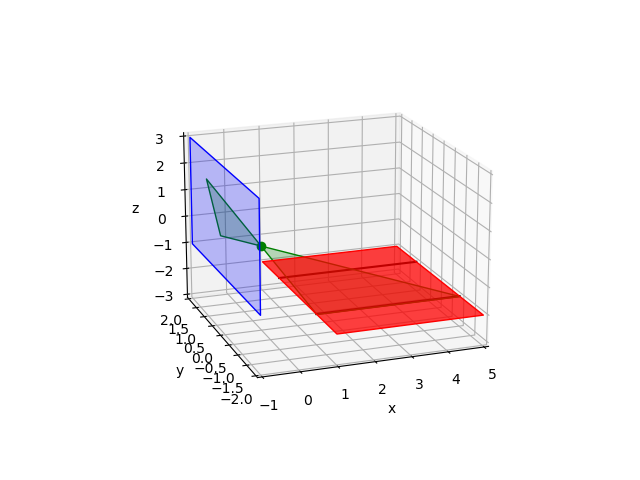

In [2]:
# camera perspective
%matplotlib widget
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = 18, azim = -110)

z0 = -2
# create the scene plane 
x = [0+1, 4+1, 4+1, 0+1]
y = [-2, -2, 2, 2]
z = [z0, z0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'r', alpha = 0.75))

x0 = -1
# create the camera plane 
x = [x0, x0, x0, x0]
y = [-2, -2, 2, 2]
z = [z0-1+2, z0+3+2, z0+3+2, z0-1+2]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'b', alpha = 0.25))

ax.plot([1, 5], [-1, -1], [z0, z0], 'k')   # right track
ax.plot([1, 5], [1, 1], [z0, z0], 'k')      # left track

ax.plot([0], [0], [0], 'go')   # the camera lens

# create bowtie through eye and right track onto image plane
x = [0, 5, 1]
y = [0, -1, -1]
z = [0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))
x = [0, x0, x0]
y = [0, -x0, -x0/5]
z = [0, z0*x0, z0*x0/5]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))

ax.set_xlim(x0, 5)
ax.set_ylim(-2, 2)
ax.set_zlim(z0-1, z0+3+2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:persp2} The black line in the red scene is projected onto the blue image plane by following straight lines from the track through the camera's lens. Please run and rotate to explore the interplay of point, line, and plane. Do you see that although the projection remains $z=2y$, that the track is reflected in both the $y$ and $z$ directions in comparison with our previous figure? \end{myfig}

\begin{exercise}\label{ex:persp}
Modify the last two code cells to add the green triangles associated with the projection of the other track.
\end{exercise}

As cameras are rarely perpendicular to their scenes we consider the Central Projection, through the origin, of one plane onto another. We constructed our first plane, in Figure \ref{fig:vperp} as the collection of points perpendicular to a given unit vector, $n$.
As our scene and image planes need not contain the origin we allow translates. To be precise, given a unit vector $n\in\maR^3$
and a translate $b\in\maR^3$ we define

\begin{equation}\label{eq:P0}
  n^\perp = \{p\in\maR^3: n^Tp = 0\} \and
 P = b + n^\perp = \{b + p: n^Tp = 0\}
\end{equation}

Now if we simply set $c=n^Tb$ we find

\begin{equation}\label{eq:P1}
 P = \{p\in\maR^3: n^Tp = c\}
\end{equation}

We will also benefit from viewing the base plane, $n^\perp$, as the **span** of any two of its perpendicular elements, say $q$ and $r$. By this we mean

\begin{equation}\label{eq:aperp}
 n^\perp = \{xq + yr: x,y\in\maR\}
\end{equation}

and speak of $\{q,r\}$ as a **basis** for $n^\perp$.

This then permits us to express our plane as

\begin{equation}\label{eq:P2}
 P = \{b+xq + yr: x,y\in\maR \}.
\end{equation}

As such we can express a plane via its normal and translate, or via its basis and translate. With these two characterizations of $P$ we then prescribe two similar characterizations of $P'$, namely

\begin{equation}\label{eq:Pp}
 P' = \{b'+uq' + vr': u,v\in\maR \} = \{p'\in\maR^3: n'^Tp' = c' \equiv n'^Tb'\}
\end{equation}

We have offer concrete examples of these planes in Figure \ref{fig:CentProj}.

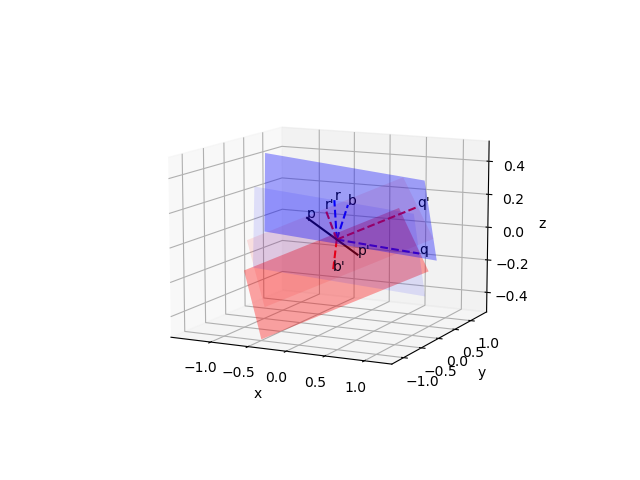

In [3]:
# Central Projection of P onto P'
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(' ')
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = 11, azim = -64)

# build the P plane

phi = np.pi/6 
a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector
aaT = np.outer(a, a)
Xa = np.array([[0, -a[2], a[1]], [a[2], 0, -a[0]], [-a[1], a[0], 0]])
K = aaT + np.sin(phi)*Xa + np.cos(phi)*(np.eye(3)-aaT)

V = np.array([[-1,1,1,-1],[-1,-1,1,1],[0,0,0,0]])  # base vertices in z=0 plane
KV = K@V   # rotated plane
n = np.array([0,0,1])    # normal to base plane
n = K@n    # normal to rotated plane

x = KV[0,:]
y = KV[1,:]
z = KV[2,:]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'b', alpha = 0.1))
q = np.array([1,0,0])
q = K@q
ax.plot3D([0,q[0]],[0,q[1]],[0,q[2]],'b--')
ax.text3D(q[0],q[1],q[2],'q')
r = np.array([0,1,0])
r = K@r
ax.plot3D([0,r[0]],[0,r[1]],[0,r[2]],'b--')
ax.text3D(r[0],r[1],r[2],'r')

b = np.array([0.1,0.1,0.2])
x = KV[0,:] + b[0]*np.ones(x.shape)
y = KV[1,:] + b[1]*np.ones(x.shape)
z = KV[2,:] + b[2]*np.ones(x.shape)
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'b', alpha = 0.35))
ax.plot3D([0,b[0]],[0,b[1]],[0,b[2]],'b--')
ax.text3D(b[0],b[1],b[2],'b')

p = np.array([-.5, -.5, 0])
p = K@p + b    # featured point on P

# now the P' plane

phi = np.pi/5  # *np.random.rand(1)
a = np.array([1,-1,4])/np.sqrt(18)   # make a unit vector
aaT = np.outer(a, a)
Xa = np.array([[0, -a[2], a[1]], [a[2], 0, -a[0]], [-a[1], a[0], 0]])
K = aaT + np.sin(phi)*Xa + np.cos(phi)*(np.eye(3)-aaT)

V = np.array([[-1,1,1,-1],[-1,-1,1,1],[0,0,0,0]])
KV = K@V
n = np.array([0,0,1])    # normal to base plane
n = K@n    # normal to rotated plane

x = KV[0,:] 
y = KV[1,:] 
z = KV[2,:] 
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'r', alpha = 0.1))
q = np.array([1,0,0])
q = K@q
ax.plot3D([0,q[0]],[0,q[1]],[0,q[2]],'r--')
ax.text3D(q[0],q[1],q[2],"q'")
r = np.array([0,1,0])
r = K@r
ax.plot3D([0,r[0]],[0,r[1]],[0,r[2]],'r--')
ax.text3D(r[0],r[1],r[2],"r'")

b = np.array([-0.1,0.1,-0.2])
x = KV[0,:] + b[0]*np.ones(x.shape)
y = KV[1,:] + b[1]*np.ones(x.shape)
z = KV[2,:] + b[2]*np.ones(x.shape)
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'r', alpha = 0.35))
ax.plot3D([0,b[0]],[0,b[1]],[0,b[2]],'r--')
ax.text3D(b[0],b[1],b[2],"b'")

pp = (np.dot(n,b)/np.dot(n,p))*p   # p', the central projection of p
ax.plot3D([p[0],pp[0]],[p[1],pp[1]],[p[2],pp[2]],'k')
ax.text3D(p[0],p[1],p[2],'p')
ax.text3D(pp[0],pp[1],pp[2],"p'")

ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(y), np.max(y))
ax.set_zlim(-.5, .5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:CentProj} Central Projection of the point $p$ from the $P$ plane (dark blue) onto the point $p'$ of the $P'$ plane (dark red). We also illustrate the two base planes, $n^\perp$ (light plue) with its basis vectors $q$ and $r$, and $n'^\perp$ (light red) with its basis vectors $q'$ and $r'$. The final components are the translation vectors $b$ and $b'$ that yield $P=b+n^\perp$ and $P'=b'+n'^\perp$. Please rotate and zoom to bring individual pieces into focus. \end{myfig}

Now as the projection of $p\in P$ is a point $p'\in P'$ on the line through $p$ it follows that

\begin{equation*}
   p' = t p \implies c' = n'^Tp' = t n'^Tp \implies t = \frac{c'}{n'^Tp}
   \hskip 0.25in\hbox{and so}\hskip 0.25in p' = \frac{c'}{n'^Tp}p
\end{equation*}

or, in terms of their basis vectors

\begin{equation}\label{eq:Pp2}
  uq' + vr' + b' = \frac{c'(xq + yr + b)}{n'^T(xq + yr + b)}
\end{equation}

Now taking the inner product of each side of (\ref{eq:Pp2}) with $q'$ we find

\begin{equation*}
  u+q'^Tb' = \frac{c'(xq'^Tq + yq'^Tr + q'^Tb)}{xq^Tn' + yr^Tn' + b^Tn'}
\end{equation*}

As each of these inner products are fixed scalars we introduce a convenient renaming and find

\begin{equation}\label{eq:Pu}
  u = \frac{h_{00} x + h_{01} y + h_{02}}{h_{20} x + h_{21} y + h_{22}}
\end{equation}

If we instead take the inner product of each side of (\ref{eq:Pp2}) with $r'$ we find

\begin{equation}\label{eq:Pv}
  v = \frac{h_{10} x + h_{11} y + h_{12}}{h_{20} x + h_{21} y + h_{22}}
\end{equation}

that is, $(u,v)$ is a fractional linear transformation of $(x,y)$. This naming, labeling and common denominator is meant to remind you of our work on the projective line in the previous notebook. To extend those ideas to $\maR^3$ we denote, for each $p\in\maR^3$, the line through $p$ by

\begin{equation*}
  \ell(p) \equiv \{ap:a\in\maR\}
\end{equation*}

and the collection of all lines by

\begin{equation}\label{eq:PPlane}
  \maP^2 \equiv \{\ell(p):p\in\maR^3\}
\end{equation}

As was the case with $\maP^1$, after graphing a few lines, we recognize a more convenient representation of $\maP^2$.

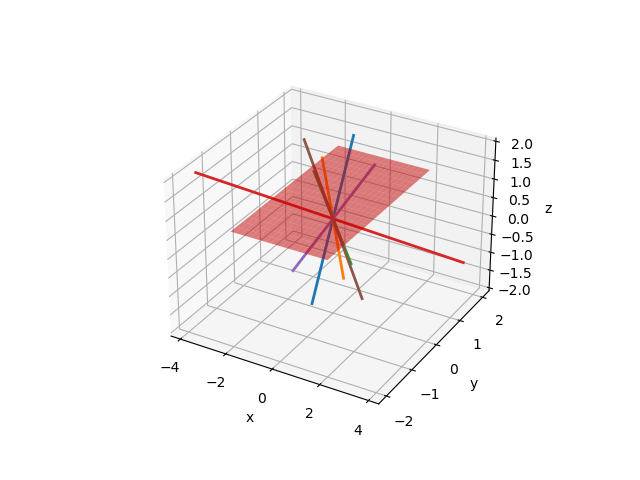

In [4]:
# The Projective Plane
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector

x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)
X, Y = np.meshgrid(x, y)   # make an (X,Y) grid on a small square
Z = np.ones(X.shape)  # height = 1
ax.plot_surface(X, Y, Z, alpha=0.5, color='r')              

for i in range(6):
    a = np.random.randn(3)
    ax.plot3D([-a[0], a[0]], [-a[1], a[1]], [-1, 2],linewidth=2)   # plot the a vector
    
ax.grid('on')
ax.set_zlim(-2,2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:PPlane} Six random lines puncturing the plane $\{[x,y,z]:z=1\}$.\end{myfig}

From Figure \ref{fig:PPlane}, we note that every line through the origin, except the ones in the plane $\{z=0\}$, crosses the plane $\{[x,y,1]:x,y\in\maR\}$ at a unique pair $[x,y]$. As such

\begin{equation}\label{eq:PLineH}
  \maP^2 = \{\ell([x,y,1]):x,y\in\maR\} \cup \{\ell([x,y,0]):x,y\in\maR\} 
\end{equation}

We interpret the first piece as simply $\maR^2$ and the second as "the lines at infinity." As the latter is precisely the projective line we arrive at

\begin{equation}\label{eq:PLineC}
  \boxed{\maP^2 = \maR^2 \cup \maP^1}
\end{equation}

Now, in this context, we recognize (\ref{eq:Pu}) and (\ref{eq:Pv}) as

\begin{equation}\label{eq:projH}
\eqalign{\ell([u,v,1]) 
&= \ell([h_{00}x + h_{01}y + h_{02}, h_{10}x + h_{11}y + h_{12}, h_{20}x + h_{21}y + h_{22}]) \cr
&= \ell\left(\left[\frac{h_{00}x + h_{01}y + h_{02}}{h_{20}x + h_{21}y + h_{22}}, \frac{h_{10}x + h_{11}y + h_{12}}{h_{20}x + h_{21}y + h_{22}}, 1 \right]\right) }
\end{equation}

We now demonstrate how to use this result to "correct" a camera's projective view. 

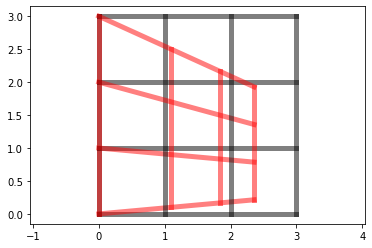

In [121]:
# Inverting a Projective Transformation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

H = np.array([[8,0,0],[-1,11,0],[-2,0,11]])   # this corrects (inverts) the projective transformation
Hi = np.linalg.inv(H)                         # so this must be the original projective transformation

NP = 4   # number of lines
x = np.arange(NP)

for i in range(NP):
    y = i*np.ones(NP)
    plt.plot(x,y,'k',linewidth=5, alpha=0.5)
    p = np.vstack((x,y,np.ones(NP)))
    Hp = Hi@p
    plt.plot(Hp[0,:]/Hp[2,:], Hp[1,:]/Hp[2,:],'r',linewidth=5, alpha=0.5)  # horizontal lines
    
    plt.plot(y,x,'k',linewidth=5, alpha=0.5)    # exchange x and y
    p = np.vstack((y,x,np.ones(NP)))
    Hp = Hi@p
    plt.plot(Hp[0,:]/Hp[2,:], Hp[1,:]/Hp[2,:],'r',linewidth=5, alpha=0.5)  # vertical lines
    
plt.axis('equal');

\begin{myfig}\label{fig:CorrectProj} Given the projected red grid we correct it, via the projective transformation in (\ref{eq:Hfin2}), to the regular black grid. \end{myfig}

With regard to Figure \ref{fig:CorrectProj} we use (\ref{eq:projH}) to construct a Projective Transformation that takes the vertices of the lower left red trapezoid

\begin{equation}\label{eq:sq1}
   (x_1,y_1) = (0,0), \hskip 0.2in
   (x_2,y_2) = (11/10,1/10), \hskip 0.2in
   (x_3,y_3) = (11/10,9/10), \hskip 0.2in
   (x_4,y_4) = (0,1)
\end{equation}

to the vertices of the lower left black square

\begin{equation}\label{eq:sq0}
   (u_1,v_1) = (0,0), \hskip 0.2in
   (u_2,v_2) = (1,0), \hskip 0.2in
   (u_3,v_3) = (1,1), \hskip 0.2in
   (u_4,v_4) = (0,1)
\end{equation}

Their substitution in (\ref{eq:projH}) brings

\begin{equation}\label{eq:ptrans}
  u_i(h_{20}x_i+h_{21}y_i+h_{22}) = h_{00}x_i+h_{01}y_i + h_{02} \\
  v_i(h_{20}x_i+h_{21}y_i+h_{22}) = h_{10}x_i+h_{11}y_i + h_{12}
\end{equation}

If we stack these 4 sets of 2 we find a system for $H$

\begin{equation}\label{eq:H0}
 \eqalign{0 &= h_{02} \cr 0 &= h_{12} \cr} 
 \\
 \eqalign{h_{20}(11/10)+h_{21}/10+h_{22} &= h_{00}(11/10)+h_{01}/10 + h_{02} \cr
  0 &= h_{10}(11/10)+h_{11}/10 + h_{12} \cr} 
  \\
  \eqalign{h_{20}(11/10)+h_{21}(9/10)+h_{22} &= h_{00}(11/10)+h_{01}(9/10) + h_{02} \cr
  h_{20}(11/10)+h_{21}(9/10)+h_{22} &= h_{10}(11/10)+h_{11}(9/10) + h_{12} \cr}
  \\
  \eqalign{0 &= h_{01} + h_{02} \cr
  h_{21}+h_{22} &= h_{11} + h_{12} \cr}
\end{equation}

We note that the 1st, 2nd, and 7th equations in (\ref{eq:H0}) render

\begin{equation*}
 h_{01}=h_{02}=h_{12} = 0 
\end{equation*}

and that this information, when used in the 4th equation renders

\begin{equation*}
  h_{10} = -h_{11}/11
\end{equation*}

while the 5th and 6th equations render

\begin{equation*}
  h_{00} = 8h_{11}/11
\end{equation*}

which causes the 3rd and 5th equations to yield

\begin{equation*}
  h_{21} = 0
\end{equation*}

and so the 8th equation becomes

\begin{equation*}
  h_{22} = h_{11}
\end{equation*}

which, finally, causes the 3rd equation to reveal

\begin{equation*}
  h_{20} = -2h_{11}/11.
\end{equation*}

On collecting these facts we find

\begin{equation}\label{eq:Hfin}
H = h_{11}\begin{bmatrix} 8/11 & 0 & 0 \\ -1/11 & 1 & 0 \\ -2/11 & 0 & 1 \end{bmatrix}
\end{equation}

We now note from (\ref{eq:ptrans}) that multiplication of $H$ by a common scalar does not change the system of equations. This then permits us to make the convenient choice $h_{11}=11$ and arrive at the integer matrix

\begin{equation}\label{eq:Hfin2}
H = \begin{bmatrix} 8 & 0 & 0 \\ -1 & 11 & 0 \\ -2 & 0 & 11 \end{bmatrix}
\end{equation}

This is the transformation that sends the projected red grid to the regular black grid in Figure \ref{fig:CorrectProj}.

In subsequent notebooks we will develop systematic means for solving systems of equations like (\ref{eq:H0}). As our particular system has a geometric provenance there are even approaches, see e.g., <a href="http://www.ams.org/publicoutreach/feature-column/fc-2013-03">Austin</a> that retain a geometric flavor.

\begin{exercise}\label{ex:seeP2}
In our previous notebook we visualized the projective line as a circle, and went on to visualize the action of $\maR^{2\times 2}$ on $\maP^1$ as a closed curve on a torus. The visualization of $\maP^2$ requires considerably greater imagination. As one clue to its strangeness please show that parallel lines always intersect.
\end{exercise}